# Install files

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 52.7 MB/s eta 0:00:00


# Data loading and Preprocessing

In [ ]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the CSV file into a Pandas DataFrame
dataset_df = pd.read_csv("/content/drive/MyDrive/Admission_Predict_A3.csv")

print(dataset_df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
#Print informtion related to data
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [ ]:
#Check for missing values
print(dataset_df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


We don't need to clean/impute the dataset since there are no missing values


In [ ]:
#Statistical summary of the data
print(dataset_df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

# Scaling

In [ ]:
# Separate features and target variable
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = dataset_df[features]
y = dataset_df['Chance of Admit ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


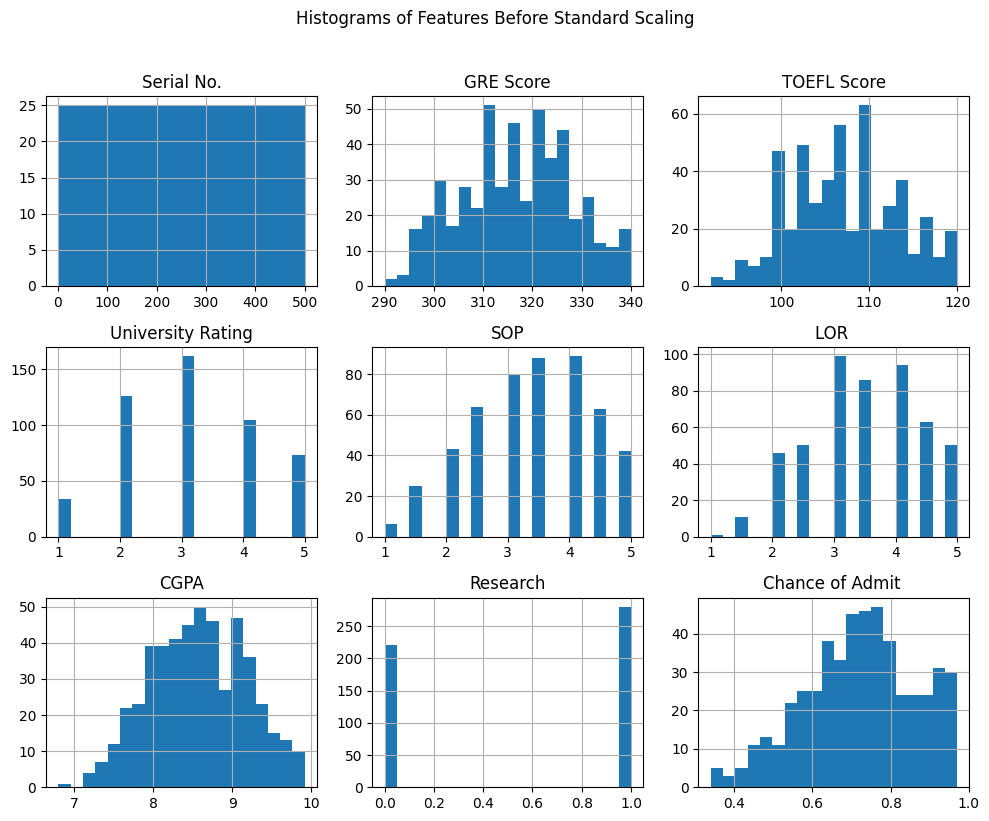

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of the numerical features
dataset_df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Features Before Standard Scaling', y=1.02)  # Add a title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

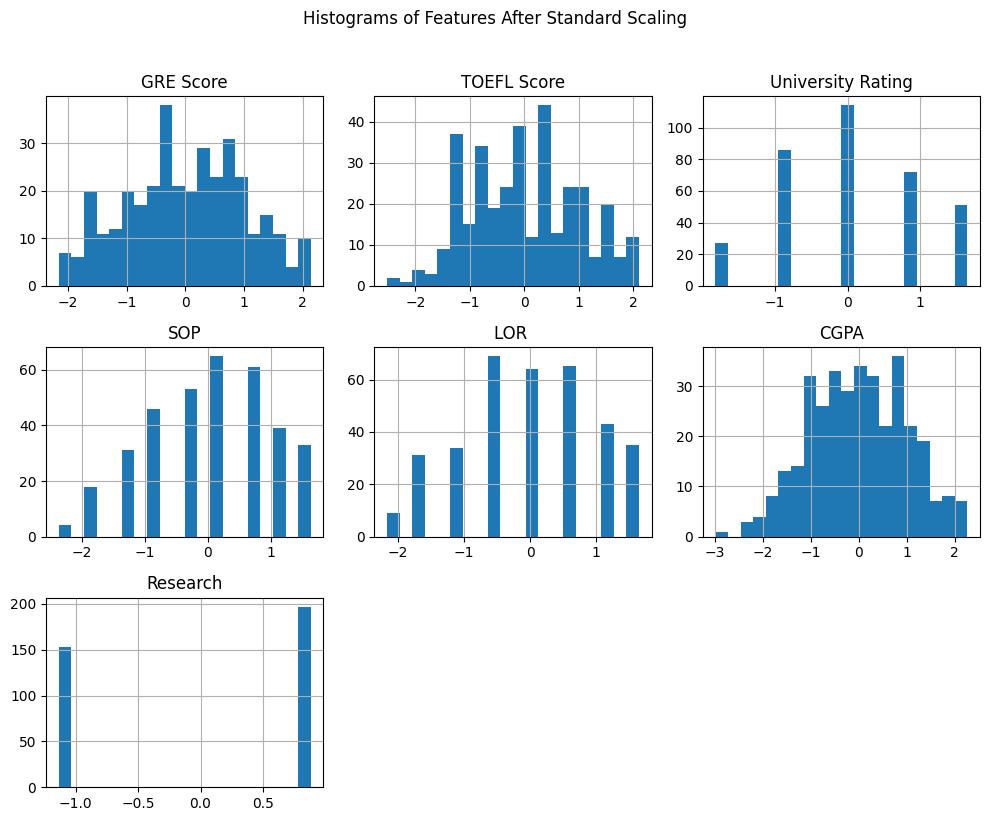

In [ ]:
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)

X_train_scaled_df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Features After Standard Scaling', y=1.02)  # Add a title
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


StandardScaler transforms the data by subtracting the mean and dividing by the standard deviation for each feature. This ensures the features have a mean of 0 and a standard deviation of 1, resulting in a standard normal distribution.

**Reasons for choosing StandardScaler**

**Algorithm Compatibility:** Algorithms, like linear regression and logistic regression, assume that features are on a similar scale and centered around zero. StandardScaler helps meet this assumption, improving model performance. This also helps for gradient descent algorithms.

**Outlier Handling:** StandardScaler is less sensitive to outliers compared to MinMaxScaler. Outliers can significantly skew the scaling when using MinMaxScaler.

**Data Distribution:** The data (as seen from the histograms) doesn't necessarily fall within a specific range. StandardScaler works well when the data distribution isn't strictly bounded.


**How Scaling Impacts Model Performance**


1.   **Improved Model Convergence:** Many machine learning algorithms, such as gradient descent-based models (neural networks, logistic regression), benefit from scaled data. When features are on different scales, gradient updates can become imbalanced, leading to slower or poor convergence.

2.   **Handling Distance-Based Models:** Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) rely on distance calculations. Without scaling, features with larger values may dominate the model, leading to biased predictions.

3.  **Impact on Regularization:** In models with regularization, such as Ridge or Lasso regression, scaling helps prevent one feature from having a disproportionately large penalty due to its larger magnitude, improving the model’s generalization performance.

4.  **Outliers:** If the data contains outliers, using a scaler that is less sensitive to outliers, like the RobustScaler, can improve model robustness.

# Dimensionality Reduction using LDA

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Admission_Predict_A3.csv")
# Define bins for the 'Chance of Admit' column (values from 0 to 1)
bins = [0, 0.6, 0.8, 1.0]  # Defining 3 categories: low, medium, high
labels = ['low', 'medium', 'high']

# Create a new column with binned categories
data['Admit_Category'] = pd.cut(data['Chance of Admit '], bins=bins, labels=labels)

# Check the distribution of categories
print(data['Admit_Category'].value_counts())


Admit_Category
medium    261
high      142
low        97
Name: count, dtype: int64


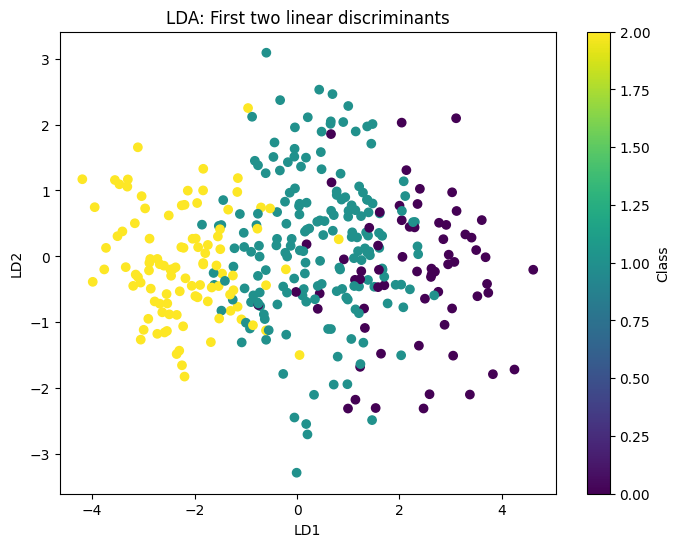

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select only the numerical features for LDA
X = data.drop(['Chance of Admit ', 'Admit_Category'], axis=1)  # Drop target variable
y = data['Admit_Category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # You can specify the number of components

# Fit LDA on the training data
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform the test data as well
X_test_lda = lda.transform(X_test)


# Plot the first two LDA components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train.map({'low': 0, 'medium': 1, 'high': 2}))
plt.title("LDA: First two linear discriminants")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.colorbar(label='Class')
plt.show()


**Justify the Choice of the Number of Components Retained**

The number of components in LDA is determined by the number of classes in the target variable. Since we have three categories (low, medium, high), the maximum number of LDA components we can retain is min(n_classes - 1, n_features).

For our case: we have 3 categories, so n_components = 2.

This is because LDA can reduce the data to at most n_classes - 1 dimensions, and since we have 3 classes, we can reduce it to 2 components.

**Evaluating the impact of dimensionality reduction**

After performing LDA, the dimensionality of your data is reduced to 2 components, which still maintains most of the class-separating information.

**How Dimensionality Reduction Influences the Dataset**

1. **Improved Class Separation:** LDA reduces the dimensionality by projecting the data into a space where the classes are maximally separated. This leads to better classification accuracy, especially in cases where the classes are not easily separable in the original high-dimensional space.

2. **Reduction in Overfitting:** Reducing the number of features often prevents models from learning noise, leading to improved generalization performance, especially in datasets with a small number of samples.

3. **Faster Computation:** With fewer dimensions, machine learning models train faster, especially those that are computationally intensive with high-dimensional data (like SVM or KNN).

4. **Loss of Information:** Reducing dimensionality can sometimes lead to a loss of important information. LDA strikes a balance by keeping the most relevant information for class separation, but if the initial data contained features that weren't useful for class discrimination, they might be lost during this process.

# Linear Regression


## **Linear Regression using TensorFlow**

Epoch [100/1000], Loss: 0.7186019420623779
Epoch [200/1000], Loss: 0.17268763482570648
Epoch [300/1000], Loss: 0.07052045315504074
Epoch [400/1000], Loss: 0.03484898805618286
Epoch [500/1000], Loss: 0.019077306613326073
Epoch [600/1000], Loss: 0.011487997137010098
Epoch [700/1000], Loss: 0.007689415477216244
Epoch [800/1000], Loss: 0.005739729851484299
Epoch [900/1000], Loss: 0.004719899967312813
Epoch [1000/1000], Loss: 0.004178403876721859
Mean Squared Error on Test Data: 0.004212817642837763


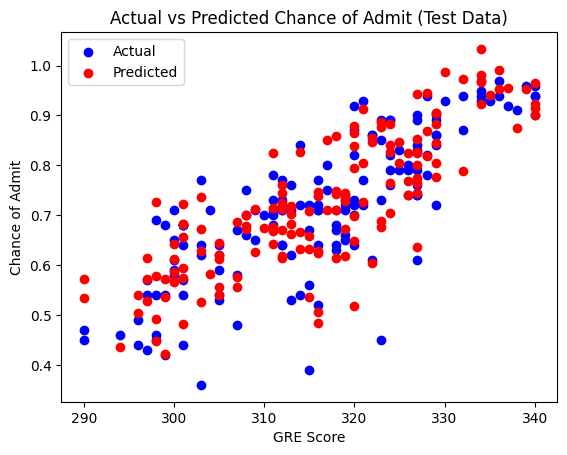

In [ ]:
# Convert data into TensorFlow tensors
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.values.reshape(-1, 1), dtype=tf.float32)  # Reshape to (400, 1)

# Initialize weights and bias as TensorFlow variables
num_features = X_train.shape[1]
W = tf.Variable(tf.random.normal(shape=(num_features, 1)), name='weights')
b = tf.Variable(tf.random.normal(shape=(1,)), name='bias')

# Define the linear regression model
def linear_regression(X):
    return tf.matmul(X, W) + b

# Define the mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Choose Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, y_pred)

    # Backward pass
    gradients = tape.gradient(loss, [W, b])

    # Update weights and bias
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.numpy()}')

# Evaluate the trained model using the testing data
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.values.reshape(-1, 1), dtype=tf.float32)
y_pred_test = linear_regression(X_test_tensor)
mse_test = mean_squared_error(y_test_tensor, y_pred_test).numpy()
print(f'Mean Squared Error on Test Data: {mse_test}')

# Plot actual vs predicted probabilities
y_pred_train = linear_regression(X_train_tensor).numpy().flatten()
#plt.scatter(y_train, y_pred_train, label='Training Data')
#plt.scatter(X_test, y_pred_test, label='Predicted Testing Data')
plt.scatter(X_test['GRE Score'], y_test, color='blue', label='Actual')
plt.scatter(X_test['GRE Score'], y_pred_test.numpy().flatten(), color='red', label='Predicted')

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit (Test Data)')
plt.legend()
plt.show()

**Applying Stochastic Gradient Descent**

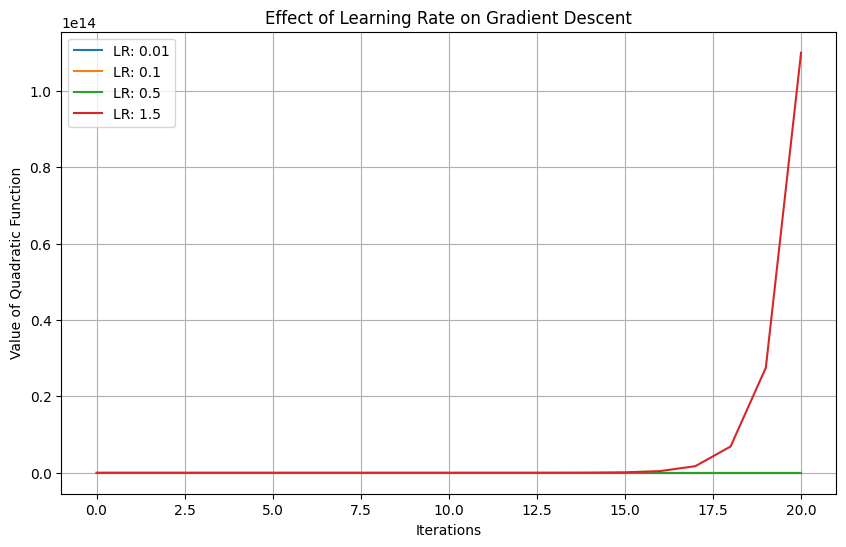

In [ ]:
# Define a simple quadratic function
def quadratic_function(x):
    return x ** 2

# Define the gradient of the quadratic function
def gradient_quadratic_function(x):
    return 2 * x

# Gradient descent optimization
def gradient_descent(learning_rate, iterations):
    # Initial point
    x = 10.0
    # Store the history of updates
    updates = [x]
    # Perform gradient descent iterations
    for i in range(iterations):
        # Update using gradient descent rule
        x = x - learning_rate * gradient_quadratic_function(x)
        # Append the updated value to updates
        updates.append(x)
    return updates

# Perform gradient descent with different learning rates
learning_rates = [0.01, 0.1, 0.5, 1.5]  # Varying learning rates
iterations = 20  # Number of iterations

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    updates = gradient_descent(lr, iterations)
    plt.plot(range(iterations + 1), [quadratic_function(x) for x in updates], label=f'LR: {lr}')

plt.title('Effect of Learning Rate on Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Value of Quadratic Function')
plt.legend()
plt.grid(True)
plt.show()

## **Linear Regression using Scikit Learn**

Epoch [5/50], Loss: 0.4671250283718109
Epoch [10/50], Loss: 0.4665106236934662
Epoch [15/50], Loss: 0.4659045934677124
Epoch [20/50], Loss: 0.4653065800666809
Epoch [25/50], Loss: 0.46471649408340454
Epoch [30/50], Loss: 0.4641340970993042
Epoch [35/50], Loss: 0.4635591208934784
Epoch [40/50], Loss: 0.4629914164543152
Epoch [45/50], Loss: 0.4624307155609131
Epoch [50/50], Loss: 0.4618770480155945
Accuracy: 0.8666666666666667


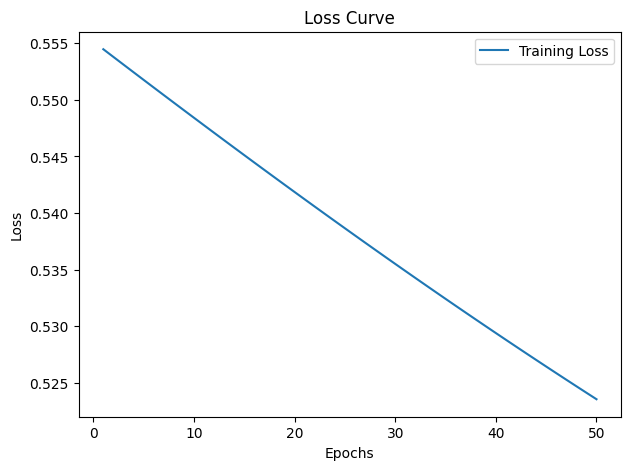

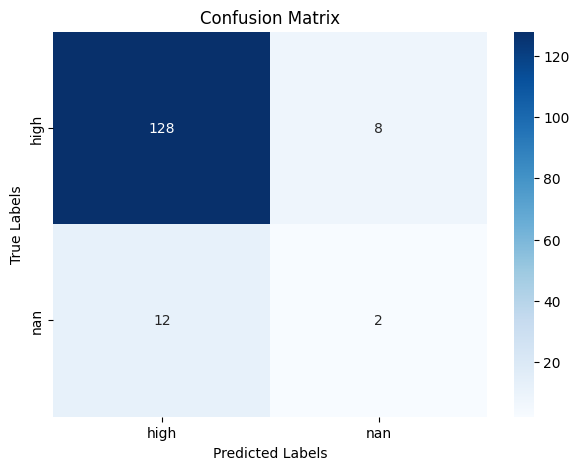

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, and y_test are already defined

y_train_binned = pd.cut(y_train, bins=[0, 0.33, 0.67, 1.0], labels=['low', 'medium', 'high'])
y_test_binned = pd.cut(y_test, bins=[0, 0.33, 0.67, 1.0], labels=['low', 'medium', 'high'])

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_binned)
y_test_encoded = label_encoder.transform(y_test_binned)

# Convert data to TensorFlow tensors
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train_encoded, dtype=tf.int32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test_encoded, dtype=tf.int32)

# Initialize weights and bias as TensorFlow variables
num_classes = len(label_encoder.classes_)
num_features = X_train_tensor.shape[1]
W = tf.Variable(tf.random.normal(shape=(num_features, num_classes)), name='weights')
b = tf.Variable(tf.random.normal(shape=(num_classes,)), name='bias')

# Define the logistic regression model with softmax activation
def logistic_regression(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

# Define cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# Choose Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the logistic regression model
epochs = 50
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(X_train_tensor)
        loss = cross_entropy_loss(y_train_tensor, y_pred)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.numpy()}')

# Predictions on the test set
y_pred_test_probs = logistic_regression(X_test_tensor).numpy()
y_pred_test_labels = np.argmax(y_pred_test_probs, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_test_labels == y_test_encoded)
print(f'Accuracy: {accuracy}')


# Plotting the loss curve
plt.figure(figsize=(7, 5))
plt.plot(range(1, epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Predictions on the test set
y_pred_test_probs = logistic_regression(X_test_tensor).numpy()
y_pred_test_labels = np.argmax(y_pred_test_probs, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_test_labels)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



# Logistic Regression

In [ ]:
# Separate features and target variable for linear regression
features_lr = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X_lr = dataset_df[features_lr]
y_lr = dataset_df['Chance of Admit ']

# Separate features and target variable for logistic regression
features_logistic = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X_logistic = dataset_df[features_logistic]
y_logistic = dataset_df['Chance of Admit ']

# Standardize features for both models
scaler = StandardScaler()
X_lr_scaled = scaler.fit_transform(X_lr)
X_logistic_scaled = scaler.fit_transform(X_logistic)

# Linear Regression
linear_regression_mses = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_lr_scaled):
    X_train, X_test = X_lr_scaled[train_index], X_lr_scaled[test_index]
    y_train, y_test = y_lr.iloc[train_index], y_lr.iloc[test_index]

    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    linear_regression_mses.append(mse_lr)

# Logistic Regression
logistic_regression_accuracies = []
kf = KFold(n_splits=5, shuffle=True, random_state=42) #k-fold validation
for train_index, test_index in kf.split(X_logistic_scaled):
    X_train, X_test = X_logistic_scaled[train_index], X_logistic_scaled[test_index]
    y_train, y_test = y_logistic.iloc[train_index], y_logistic.iloc[test_index]

    # Binning the target column into three distinct levels: low, medium, and high
    y_train_binned = pd.cut(y_train, bins=[0, 0.33, 0.67, 1.0], labels=['low', 'medium', 'high'])
    y_test_binned = pd.cut(y_test, bins=[0, 0.33, 0.67, 1.0], labels=['low', 'medium', 'high'])

    # Encode labels to numerical values
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_binned)
    y_test_encoded = label_encoder.transform(y_test_binned)

    # Convert data to TensorFlow tensors
    X_train_tensor = tf.constant(X_train, dtype=tf.float32)
    y_train_tensor = tf.constant(y_train_encoded, dtype=tf.int32)
    X_test_tensor = tf.constant(X_test, dtype=tf.float32)
    y_test_tensor = tf.constant(y_test_encoded, dtype=tf.int32)

    # Initialize weights and bias as TensorFlow variables
    num_classes = len(label_encoder.classes_)
    num_features = X_train_tensor.shape[1]
    W = tf.Variable(tf.random.normal(shape=(num_features, num_classes)), name='weights')
    b = tf.Variable(tf.random.normal(shape=(num_classes,)), name='bias')

    # Define the logistic regression model with softmax activation
    def logistic_regression(X):
        return tf.nn.softmax(tf.matmul(X, W) + b)

    # Define cross-entropy loss function
    def cross_entropy_loss(y_true, y_pred):
        return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

    # Choose Stochastic Gradient Descent (SGD) optimizer
    optimizer = tf.optimizers.SGD(learning_rate=0.01)

    # Training the logistic regression model
    epochs = 50
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = logistic_regression(X_train_tensor)
            loss = cross_entropy_loss(y_train_tensor, y_pred)

        gradients = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W, b]))

    # Predictions on the test set
    y_pred_test_probs = logistic_regression(X_test_tensor).numpy()
    y_pred_test_labels = np.argmax(y_pred_test_probs, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred_test_labels)
    logistic_regression_accuracies.append(accuracy)

# Output results
print("Linear Regression MSEs:", linear_regression_mses)
print("Logistic Regression Accuracies:", logistic_regression_accuracies)


Linear Regression MSEs: [<tf.Tensor: shape=(), dtype=float64, numpy=0.0037046553987884123>, <tf.Tensor: shape=(), dtype=float64, numpy=0.0043493517384436825>, <tf.Tensor: shape=(), dtype=float64, numpy=0.0033467354085245722>, <tf.Tensor: shape=(), dtype=float64, numpy=0.004582232308923849>, <tf.Tensor: shape=(), dtype=float64, numpy=0.002544493479099228>]
Logistic Regression Accuracies: [0.64, 0.61, 0.29, 0.31, 0.75]


## **Comparision with Random Forest**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Create and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
logreg_preds = logreg.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)

# Calculate evaluation metrics for both models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print("-" * 20)

evaluate_model(y_test, logreg_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")

Metrics for Logistic Regression:
Accuracy: 0.9533
Precision: 0.9510
Recall: 1.0000
F1-score: 0.9749
AUC-ROC: 0.7500
--------------------
Metrics for Random Forest:
Accuracy: 0.9400
Precision: 0.9441
Recall: 0.9926
F1-score: 0.9677
AUC-ROC: 0.7106
--------------------


# Hyperparameter tuning

In [ ]:
# Separate features and target variable
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = dataset_df[features]
y = dataset_df['Chance of Admit ']

# Binarize the target variable based on threshold 0.5
y_binary = (y >= 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Perform scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define your model architecture and compile it
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Vary hyperparameters and train the model
learning_rates = [0.001, 0.01, 0.1]
num_epochs = [50, 100, ]
batch_sizes = [32, 64, ]

for lr in learning_rates:
    for epochs in num_epochs:
        for batch_size in batch_sizes:
            print(f"Training with lr={lr}, epochs={epochs}, batch_size={batch_size}")
            model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

            # Evaluate the model
            loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
            print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

Training with lr=0.001, epochs=50, batch_size=32
Validation Loss: 0.5336105227470398, Validation Accuracy: 0.7666666507720947
Training with lr=0.001, epochs=50, batch_size=64
Validation Loss: 0.44600555300712585, Validation Accuracy: 0.846666693687439
Training with lr=0.001, epochs=100, batch_size=32
Validation Loss: 0.2896316349506378, Validation Accuracy: 0.9066666960716248
Training with lr=0.001, epochs=100, batch_size=64
Validation Loss: 0.2514593005180359, Validation Accuracy: 0.9066666960716248
Training with lr=0.01, epochs=50, batch_size=32
Validation Loss: 0.2286841869354248, Validation Accuracy: 0.9066666960716248
Training with lr=0.01, epochs=50, batch_size=64
Validation Loss: 0.21871083974838257, Validation Accuracy: 0.9133333563804626
Training with lr=0.01, epochs=100, batch_size=32
Validation Loss: 0.19502006471157074, Validation Accuracy: 0.9266666769981384
Training with lr=0.01, epochs=100, batch_size=64
Validation Loss: 0.18681128323078156, Validation Accuracy: 0.933333